## Part II: Add VI computation and measured LAI to the df
It adds VI from spyndex (awesome) and measured LAI

In [27]:
from pathlib import Path
import numpy as np
import pandas as pd
import glob

Data_df_list = glob.glob(r"Data/*df_bands_*.csv")

# reading the dataframes containing the spectral bands, VI and measured LAI
ChiptoVI_df = pd.read_csv(Data_df_list[0])
ChiptoVI_f_df = pd.read_csv(Data_df_list[1])
NDVIc_df = pd.read_csv(Data_df_list[2])
NDVIc_f_df = pd.read_csv(Data_df_list[3])
Transect_df = pd.read_csv(Data_df_list[4])
Transect_f_df = pd.read_csv(Data_df_list[5])
LAI_eqs = pd.read_csv(r"Data/Best_equations.csv", sep =',')
LAI_eqs.head(12)


,Model,scenario,name,Eq_numb,LAI_eq
0,PySR,ChiptoVI,PySR_ChiptoVI,19,(((BCC + 0.38803244) / (((((CH * CH) / (FC / C...
1,PySR,ChiptoVI_f,PySR_ChiptoVI_f,14,((4.7140665 / (3.7442265 - (((CH * (((CH * CH)...
2,PySR,NDVIc,PySR_NDVIc,11,((CH - (GCC / (-1.2562525 - (NDYI * -2.5201893...
3,PySR,NDVIc_f,PySR_NDVIc_f,13,NDVIf + ((-0.8929279 / (((CH * (((((CH * -0.03...
4,PySR,Tran,PySR_Tran,14,(((11.281451 / ((((CH * BAI) - SR) * ((CH + ((...
5,PySR,Tran_f,PySR_Tran_f,14,(1.2127819 / (NDVIf - (((((NIR - (CH * 0.33663...
6,Euqa,ChiptoVI,Euqa_ChiptoVI,24,7.53452348975602*BNDVI + 3.15794906498864*FC*I...
7,Euqa,ChiptoVI_f,Euqa_ChiptoVI_f,28,0.426807294208343*CH + 206.951378206671*FC*EVI...
8,Euqa,NDVIc,Euqa_NDVIc,20,3.67878973956415*NDVIf + 17.1051135825517*BCC*...
9,Euqa,NDVIc_f,Euqa_NDVIc_f,24,0.619093455380083 + 168.201140218509*FC*EVI2/(...


In [98]:
## 1 LAI modeled for ChiptoVI df
# pySR
expr = LAI_eqs.loc[LAI_eqs['name'] == 'PySR_ChiptoVI', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
ChiptoVI_df = ChiptoVI_df.eval(f"PySR_1 = {expr}") # Add the new column using DataFrame.eval, passing the result into assign via eval's engine
# Eureqa
expr2 = LAI_eqs.loc[LAI_eqs['name'] == 'Euqa_ChiptoVI', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
ChiptoVI_df = ChiptoVI_df.eval(f"Euqa_1 = {expr2}") # Add the new column using DataFrame.eval, passing the result into assign via eval's engine
LAI_df_1 = ChiptoVI_df[["Raster","LAI","PySR_1","Euqa_1"]]

## 2 LAI modeled for ChiptoVI_f df
# pySR
expr3 = LAI_eqs.loc[LAI_eqs['name'] == 'PySR_ChiptoVI_f', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
ChiptoVI_f_df = ChiptoVI_f_df.eval(f"PySR_2 = {expr3}") # Add the new column using DataFrame.eval, passing the result into assign via eval's engine
# Eureqa
expr4 = LAI_eqs.loc[LAI_eqs['name'] == 'Euqa_ChiptoVI_f', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
ChiptoVI_f_df = ChiptoVI_f_df.eval(f"Euqa_2 = {expr4}") # Add the new column using DataFrame.eval, passing the result into assign via eval's engine
LAI_df_2 = ChiptoVI_f_df[["PySR_2","Euqa_2"]]

## 3 LAI modeled for NDVIc df
# pySR
expr5 = LAI_eqs.loc[LAI_eqs['name'] == 'PySR_NDVIc', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
NDVIc_df = NDVIc_df.eval(f"PySR_3 = {expr5}") # Add the new column using DataFrame.eval, passing the result into assign via eval's engine
# Eureqa
expr6 = LAI_eqs.loc[LAI_eqs['name'] == 'Euqa_NDVIc', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
NDVIc_df = NDVIc_df.eval(f"Euqa_3 = {expr6}") # Add the new column using DataFrame.eval, passing the result into assign via eval's engine
LAI_df_3 = NDVIc_df[["PySR_3","Euqa_3"]]

## 4 LAI modeled for NDVIc_f df
# pySR
expr7 = LAI_eqs.loc[LAI_eqs['name'] == 'PySR_NDVIc_f', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
NDVIc_f_df = NDVIc_f_df.eval(f"PySR_4 = {expr7}") # Add the new column using DataFrame.eval, passing the result into assign via eval's engine
# Eureqa
expr8 = LAI_eqs.loc[LAI_eqs['name'] == 'Euqa_NDVIc_f', 'LAI_eq'].squeeze() # squeeze() will give a scalar if there’s one value
NDVIc_f_df = NDVIc_f_df.eval(f"Euqa_4 = {expr8}")# Add the new column using DataFrame.eval, passing the result into assign via eval's engine
LAI_df_4 = NDVIc_f_df[["PySR_4","Euqa_4"]]

## 5 LAI modeled for Transect df
# pySR
expr9 ="(((11.281451 / ((((CH * BAI) - SR) * ((CH + ((c_depth + VARI) - 2.7259064)) * c_depth)) + BAI)) + ((MRBVI + 2.4298637) * FC)) / CH) + GNDVI"
Transect_df = Transect_df.eval(f"PySR_5 = {expr9}")
# Eureqa 
expr10 ="RGRI + 10.8480208985154*NIR + 3.03260815219075*FC - 0.895490196054478 - 5.06554129223927*NIR*CH"
Transect_df = Transect_df.eval(f"Euqa_5 = {expr10}")
LAI_df_5 = Transect_df[["PySR_5","Euqa_5"]]

## 6 LAI modeled for Transect_f df
# pySR
expr11 ="(1.2127819 / (NDVIf - (((((NIR - (CH * 0.33663014)) * (c_depth - (c_depth * CH))) + Blue) / FC) * ((1.0625637 / TSAVIm) - CH)))) + (NDVIf / 0.42017606)"
Transect_f_df = Transect_f_df.eval(f"PySR_6 = {expr11}")
# Eureqa
expr12 ="NIR + 1.76418623674398*NDVIf + 313.232450544872*NIR*FC/(CH + 101.887464206735*FC*EVI + c_depth*CH**6)"
Transect_f_df = Transect_f_df.eval(f"Euqa_6 = {expr12}")
LAI_df_6 = Transect_f_df[["PySR_6","Euqa_6"]]

## 7 old equation
NDVIc_df_old = NDVIc_df.copy()
expr13 ="FC+0.759*GOSAVI*MSR"
NDVIc_df_old = NDVIc_df_old.eval(f"Euqa_7 = {expr13}")
LAI_df_7 = NDVIc_df_old[["Euqa_7"]]
# combining all the modeled LAI into a single dataframe
LAI_modeled_df = pd.concat([LAI_df_1, LAI_df_2, LAI_df_3, LAI_df_4, LAI_df_5, LAI_df_6, LAI_df_7], axis=1)
LAI_modeled_df.head(10)
# saving the modeled LAI df to a csv file
LAI_modeled_df.to_csv("Modeled_LAI_allmethods.csv", index=False)

In [99]:
# Selecting df Columns for analysis
# X = LAI_modeled_df.iloc[:,2:]
X = LAI_modeled_df.drop(columns=["Raster","LAI"])
y = LAI_modeled_df["LAI"]
print(X.head())
print(y.head())

     PySR_1    Euqa_1    PySR_2    Euqa_2    PySR_3    Euqa_3    PySR_4  \
0  1.433728  1.447761  1.533890  1.504969  1.474875  1.454919  1.548536   
1  1.369638  1.342580  1.491327  1.467780  1.405808  1.399667  1.485350   
2  1.183643  0.993940  1.220188  1.258217  0.968219  1.070139  1.220489   
3  1.195595  1.020584  1.216009  1.273160  0.956204  1.058058  1.232892   
4  1.072165  0.720601  0.996943  1.041248  0.766704  0.923348  0.940829   

     Euqa_4    PySR_5    Euqa_5    PySR_6    Euqa_6    Euqa_7  
0  1.581598  1.536365  1.682461  1.468102  1.506228  1.473690  
1  1.533531  1.444307  1.616167  1.373906  1.432496  1.429538  
2  1.244637  1.199673  1.286569  1.124594  1.192654  1.223478  
3  1.247280  1.220449  1.297879  1.151078  1.211658  1.218349  
4  0.938845  0.965687  0.933562  0.925113  1.019712  0.933578  
0    1.47
1    1.50
2    1.18
3    1.16
4    1.19
Name: LAI, dtype: float64


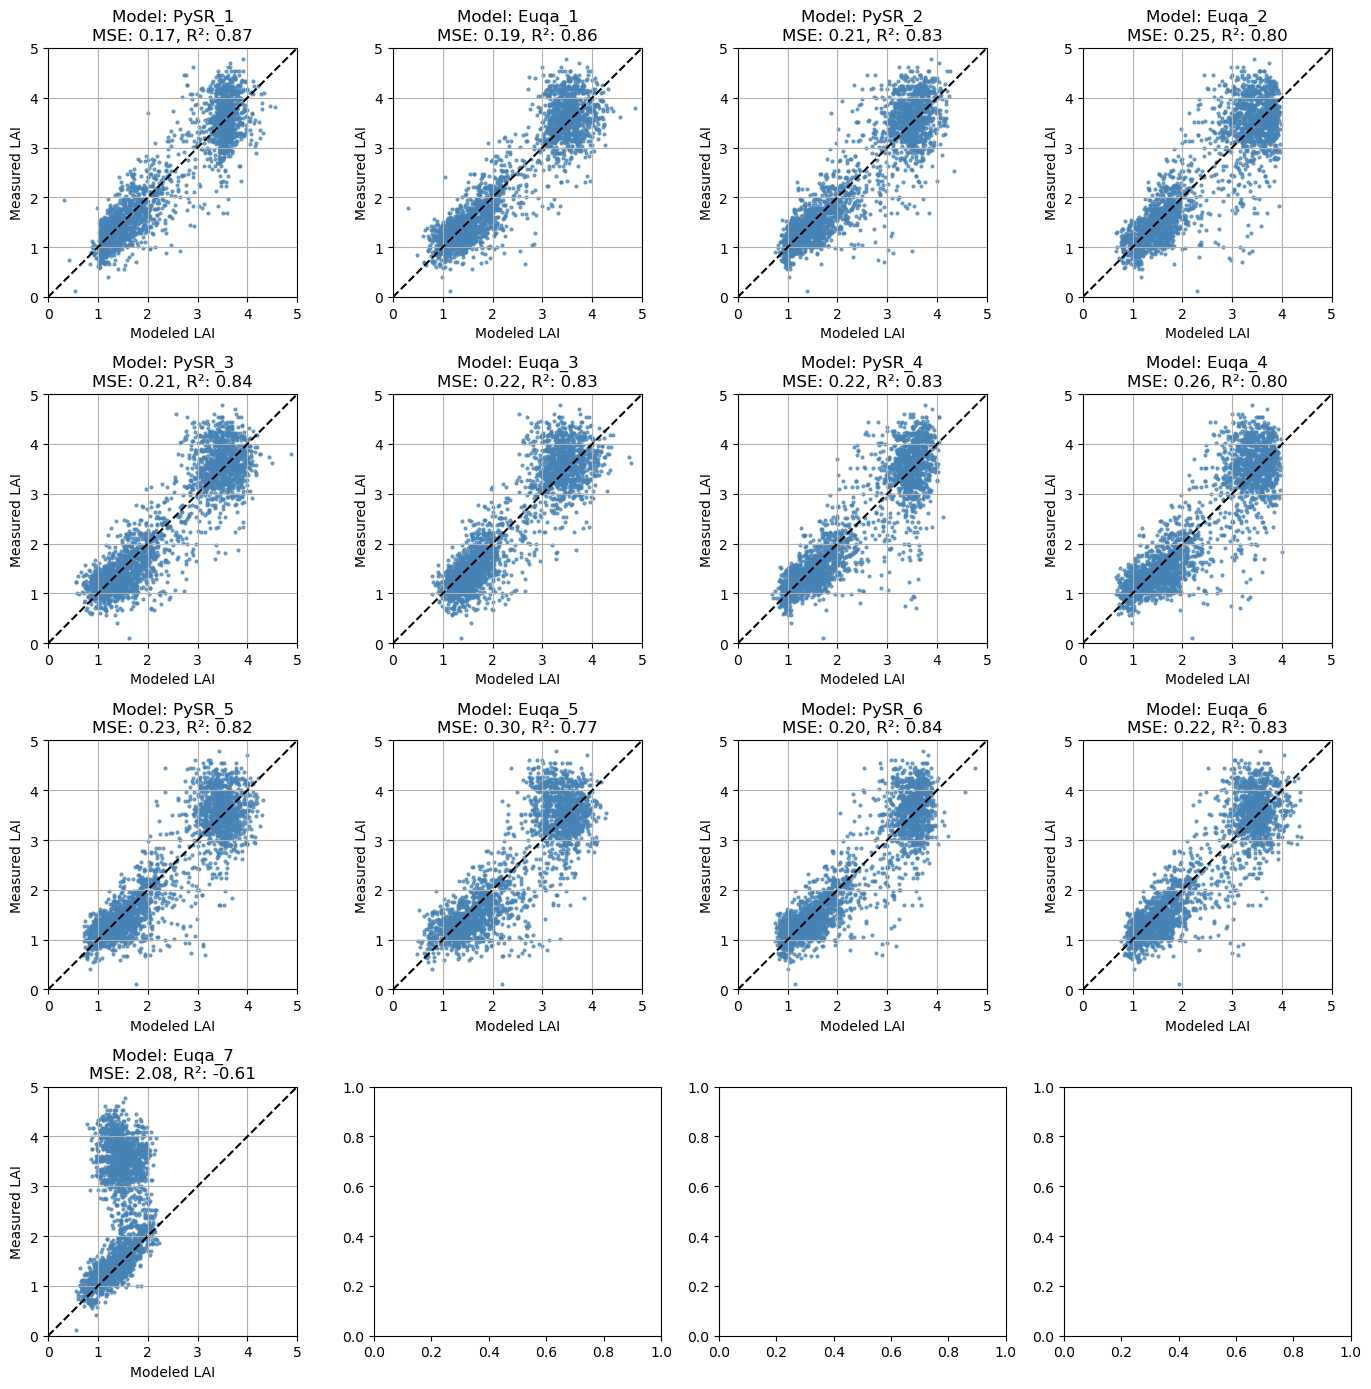

In [107]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score
# Setting plottin parameters
# Number of plots based on columns in X df
Num_eqs = X.shape[1]

# # Setting the plot grid (subplot) dimensions
Number_cols = 4
Number_rows = int(np.ceil(Num_eqs / Number_cols))

# Creating a grid of subplots 
fig, axes = plt.subplots(Number_rows, Number_cols, figsize=(14, 14))


# Loop through each subplot and each equation index
for ax, column in zip(axes.flatten(), X.columns): # 

    # -----------------------------
    # 1. Compute predictions
    # -----------------------------
    y_modeled = X[column]
    y_measured = y                               # Measured LAI (y-axis)

    # -----------------------------
    # 2. Scatter plot
    # -----------------------------
    ax.scatter(
        y_modeled, 
        y_measured, s = 4, alpha = 0.7, c='steelblue',
        label="Data points"
    )

    # 1:1 reference line (perfect agreement)
    ax.plot([0, 5], [0, 5], '--k', label="1:1 line")

    # -----------------------------
    # 3. Axis formatting
    # -----------------------------
    ax.set_xlabel("Modeled LAI")
    ax.set_ylabel("Measured LAI")
    ax.set_xlim(0, 5)
    ax.set_ylim(0, 5)
    ax.set_aspect('equal')
    # Set tick locations explicitly
    ax.set_xticks([0, 1, 2, 3, 4, 5])
    ax.grid(True)

    # -----------------------------
    # 4. Compute metrics
    # -----------------------------
    mse = np.mean((y_modeled - y_measured)**2)
    r2 = r2_score(y_measured, y_modeled)

    # -----------------------------
    # 5. Title with equation index + metrics
    # -----------------------------
    ax.set_title(
        f"Model: {column}\n"
        f"MSE: {mse:.2f}, R²: {r2:.2f}"
    )

# Improve spacing between subplots
plt.tight_layout()
plt.show()

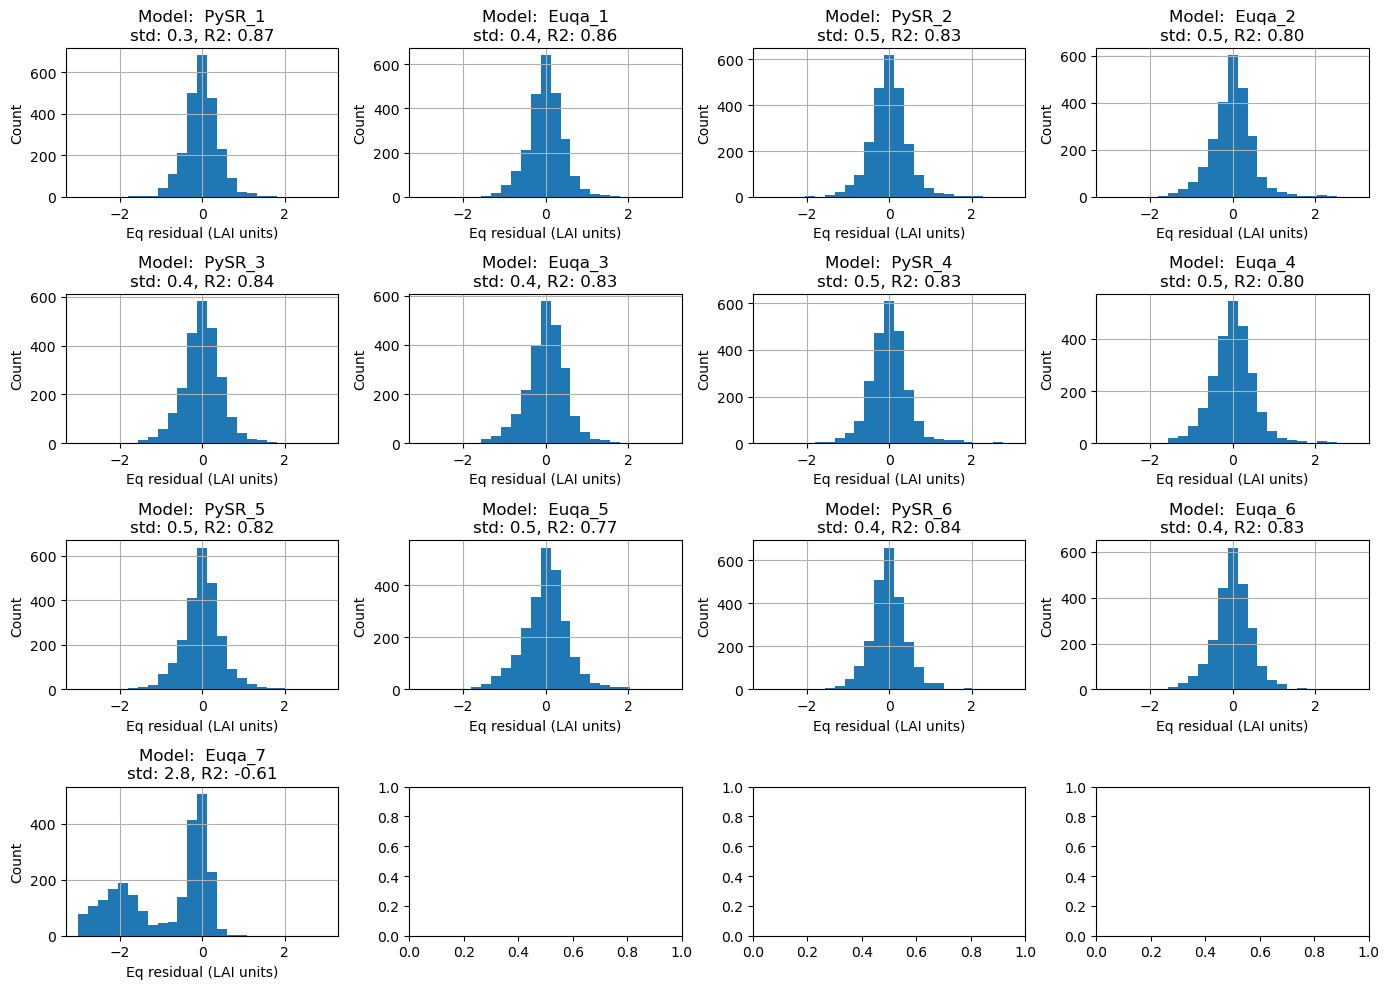

In [108]:
# Setting plotting parameters
# Number of plots based on columns in X df
Num_eqs = X.shape[1]

# # Setting the plot grid (subplot) dimensions
Number_cols = 4
Number_rows = int(np.ceil(Num_eqs / Number_cols))

# Creating a grid of subplots 
fig, axes = plt.subplots(Number_rows, Number_cols, figsize=(14, 10))


# Loop through each subplot and each equation index
for ax, column in zip(axes.flatten(), X.columns): # 
    ypredict_simpler = X[column]  # Use integer index
    ax.hist(ypredict_simpler- y,range=(-3,3), bins=25)
    ax.grid(True)
    ax.set_xlabel("Eq residual (LAI units)")
    ax.set_ylabel("Count")
    # # Set tick locations explicitly
    # ax.set_xticks([-5, -4, -3, -2, -1, 0, 1, 2, 3, 4, 5])
    # ax.plot( [0,70], [0,70], linestyle='--', color='k' )

    # ax.set_aspect('equal')
    # ax.set_xlim(0, 70)
    # ax.set_ylim(0, 70)
    std =np.std(np.power(ypredict_simpler - y, 2)).mean()
    r2 = r2_score(y, ypredict_simpler)
    ax.set_title('Model:  ' + str(column) + f"\nstd: {std:.1f}, R2: {r2:.2f}")
    ax.grid(True)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()